In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [6]:
%%bash
wc -l world_bank/*.csv

   33534 world_bank/ECON.csv
    9589 world_bank/HNP.csv
      38 world_bank/HNP_indicator_definitions.csv
   36174 world_bank/POP.csv
   79335 total


In [7]:
pd.options.display.float_format = '{:20,.2f}'.format

In [9]:
econ_df = pd.read_csv('world_bank/ECON.csv', sep=',')

In [10]:
econ_df.head(50)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,nan,nan,nan,nan,nan,nan,...,42.40,44.85,42.70,43.22,69.10,67.26,89.50,71.50,84.14,nan
1,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,9.01,nan,nan,9.96,nan,nan,14.89
2,Afghanistan,AFG,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,nan,nan,nan,nan,nan,nan,...,"10,968,623,838.99","12,962,793,894.73","14,026,799,906.60","15,517,854,927.88","17,976,392,202.46","18,362,001,144.85","17,940,808,400.70","18,321,837,979.70","18,429,410,854.93",nan
3,Afghanistan,AFG,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,nan,nan,nan,nan,nan,nan,...,5.72,18.18,8.21,10.63,15.84,2.15,-2.29,2.12,0.59,nan
4,Afghanistan,AFG,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,nan,nan,nan,nan,nan,nan,...,3.09,15.18,5.21,7.26,12.11,-1.19,-5.36,-0.84,-2.08,nan
5,Afghanistan,AFG,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,nan,nan,nan,nan,nan,nan,...,401.87,462.89,486.99,522.34,585.61,578.66,547.68,543.09,531.78,nan
6,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,nan,57.75,57.84,57.91,58.01,58.01,...,58.07,58.07,58.07,58.07,58.07,58.07,58.07,58.07,nan,nan
7,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,nan,"377,000.00","377,600.00","378,100.00","378,730.00","378,750.00",...,"379,100.00","379,100.00","379,110.00","379,100.00","379,100.00","379,100.00","379,100.00","379,100.00",nan,nan
8,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,nan,nan,nan,nan,nan,nan,...,24.69,29.14,26.08,23.58,23.64,22.59,22.01,20.55,20.97,nan
9,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,nan,nan,nan,nan,nan,nan,...,-14.92,44.57,-6.37,-7.59,18.22,0.01,-0.10,-5.66,5.97,nan


In [11]:
country_groups = ('nan', 'Lower middle income', 'Post-demographic dividend', 'High income', 'Pre-demographic dividend',
                  'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)',
                  'Heavily indebted poor countries (HIPC)', 'Caribbean small states', 'Pacific island small states',
                  'Middle income', 'Late-demographic dividend', 'OECD members', 'IDA & IBRD total', 'Not classified',
                  'East Asia & Pacific (excluding high income)', 'Latin America & the Caribbean (IDA & IBRD countries)',
                  'Low income', 'Low & middle income', 'IDA blend', 'IBRD only', 'Sub-Saharan Africa (excluding high income)', 
                  'Fragile and conflict affected situations', 'Europe & Central Asia (IDA & IBRD countries)', 'Euro area',
                  'Other small states', 'Europe & Central Asia', 'Arab World', 'Latin America & Caribbean (excluding high income)',
                  'Sub-Saharan Africa (IDA & IBRD countries)', 'Early-demographic dividend', 'IDA only', 'Small states',
                  'Middle East & North Africa (excluding high income)', 'East Asia & Pacific', 'South Asia', 'European Union',
                  'Least developed countries: UN classification', 'Middle East & North Africa (IDA & IBRD countries)',
                  'Upper middle income', 'South Asia (IDA & IBRD)', 'Central Europe and the Baltics', 'Sub-Saharan Africa',
                  'Latin America & Caribbean', 'Middle East & North Africa', 'IDA total', 'North America',
                  'Last Updated: 11/14/2018', 'Data from database: World Development Indicators', 'World')

### Growth of Gross National Income (GNI), world

In [12]:
gni_growth_df = econ_df.loc[(econ_df['Series Name'] == 'Adjusted net national income (annual % growth)') | (econ_df['Series Name'] == 'GNI (constant 2010 US$)')].drop(columns=['Country Code', 'Series Code']).fillna(0)

In [13]:
country_gni_growth_df = gni_growth_df[~gni_growth_df['Country Name'].isin(country_groups)]

In [14]:
growth_df = pd.melt(country_gni_growth_df, id_vars=['Country Name', 'Series Name'], var_name='year', value_name='value')

In [15]:
country_df = growth_df.set_index(['Country Name', 'Series Name', 'year']).unstack(1).reset_index()

In [16]:
country_df.columns = ['country', 'year', 'income growth', 'gni']

In [17]:
country_df['change (billions 2010 USD)'] = ((country_df['income growth'] / 100) * country_df['gni']) / 1000000000

In [18]:
change_df = country_df[['country', 'year', 'change (billions 2010 USD)']]

In [19]:
change_df['year'] = change_df['year'].map(lambda x: int(x.split(' ')[0]))

In [20]:
years = list(range(1970, 2017))

In [21]:
plot_df = change_df.loc[change_df['year'].isin(years)]

In [22]:
sns.set(style='darkgrid')

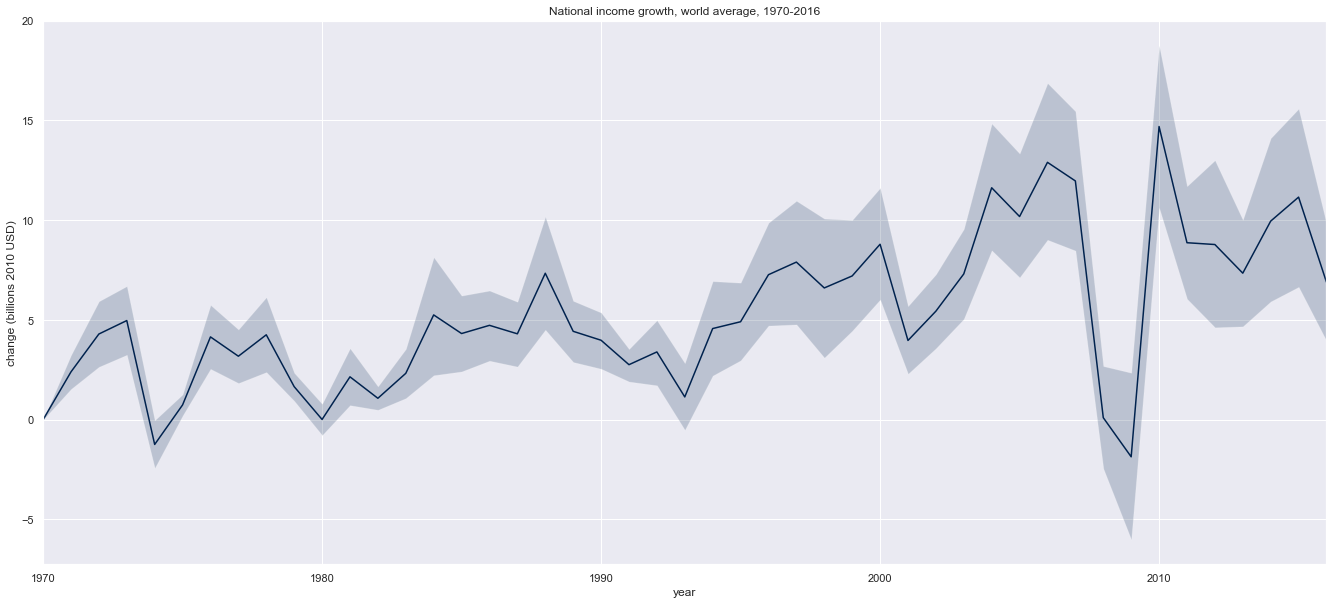

In [23]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.cividis.colors)
fig, ax = plt.subplots(figsize=(23,10))
ax.set_title('National income growth, world average, 1970-2016')
sns.tsplot(data=plot_df, time='year', unit='country', value='change (billions 2010 USD)')

### Population growth, world

In [29]:
hnp_df = pd.read_csv('world_bank/HNP.csv', sep=',')

In [30]:
pop_growth_df = hnp_df.loc[(hnp_df['Series Name'] == 'Population, total') | (hnp_df['Series Name'] == 'Population growth (annual %)')].drop(columns=['Country Code', 'Series Code']).fillna(0)

In [31]:
country_pop_growth_df = pop_growth_df[~pop_growth_df['Country Name'].isin(country_groups)]

In [32]:
growth_pop_df = pd.melt(country_pop_growth_df, id_vars=['Country Name', 'Series Name'], var_name='year', value_name='value')

In [33]:
country_pop_df = growth_pop_df.set_index(['Country Name', 'Series Name', 'year']).unstack(1).reset_index()

In [34]:
country_pop_df.columns = ['country', 'year', 'population growth', 'population']

In [35]:
country_pop_df.head()

,country,year,population growth,population
0,Afghanistan,1960 [YR1960],1.82,"8,996,351.00"
1,Afghanistan,1961 [YR1961],1.88,"9,166,764.00"
2,Afghanistan,1962 [YR1962],1.93,"9,345,868.00"
3,Afghanistan,1963 [YR1963],1.99,"9,533,954.00"
4,Afghanistan,1964 [YR1964],2.05,"9,731,361.00"


In [36]:
country_pop_df['change (population, millions)'] = ((country_pop_df['population growth'] / 100) * country_pop_df['population']) / 1000000

In [37]:
pop_change_df = country_pop_df[['country', 'year', 'change (population, millions)']]

In [38]:
pop_change_df['year'] = pop_change_df['year'].map(lambda x: int(x.split(' ')[0]))

In [39]:
years = list(range(1970, 2017))

In [40]:
pop_plot_df = pop_change_df.loc[pop_change_df['year'].isin(years)]

In [41]:
sns.set(style='darkgrid')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.twilight_shifted.colors)

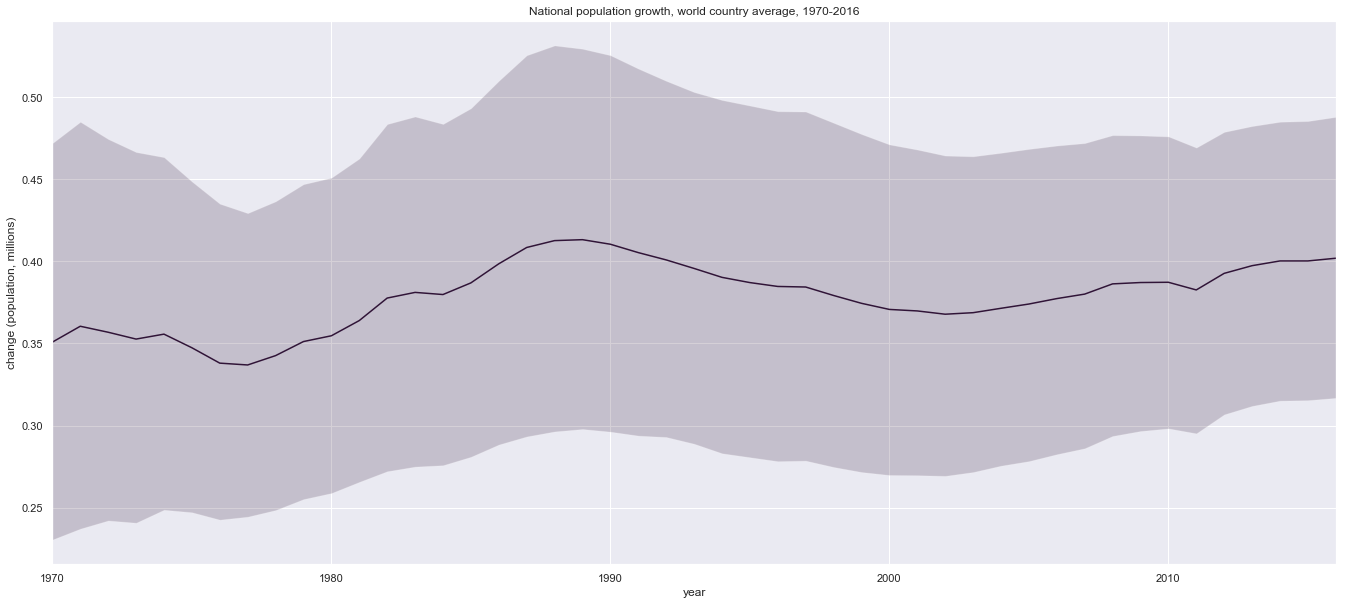

In [42]:
pop_fig, pop_ax = plt.subplots(figsize=(23,10))
pop_ax.set_title('National population growth, world country average, 1970-2016')
sns.tsplot(data=pop_plot_df, time='year', unit='country', value='change (population, millions)')

In [43]:
pop_total_df = country_pop_df[['country', 'year', 'population']]

In [44]:
pop_total_df['year'] = pop_total_df['year'].map(lambda x: int(x.split(' ')[0]))

In [45]:
pop_total_plot_df = pop_total_df.loc[pop_total_df['year'].isin(years)]

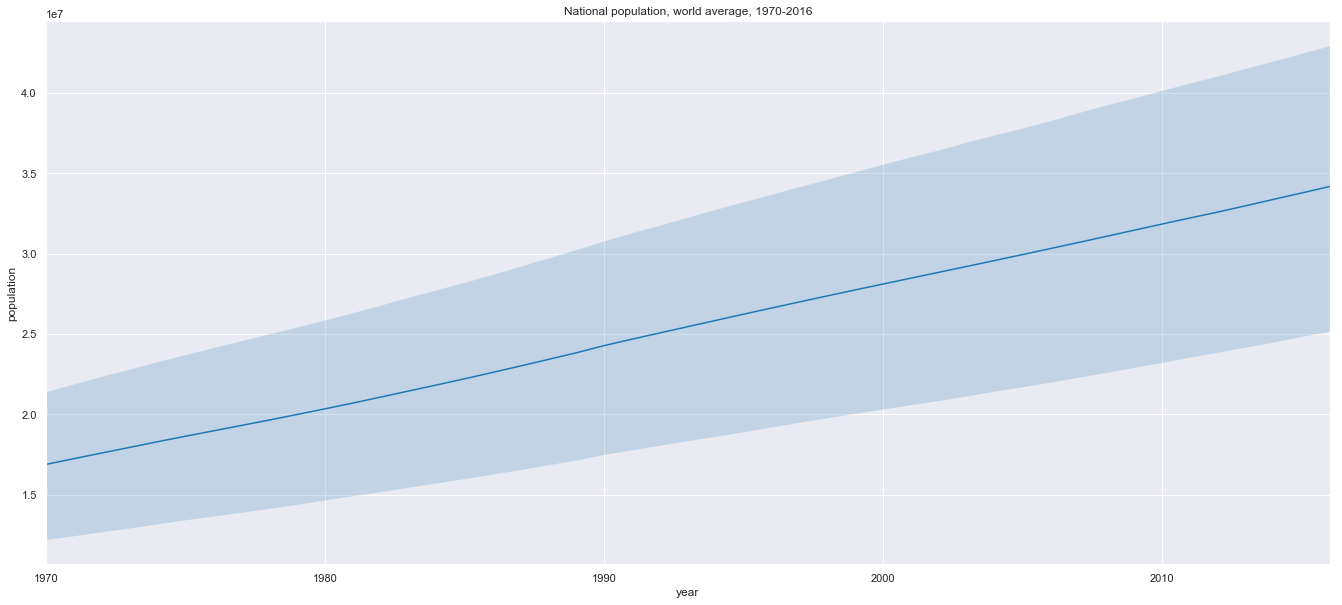

In [46]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)
popt_fig, popt_ax = plt.subplots(figsize=(23,10))
popt_ax.set_title('National population, world average, 1970-2016')
sns.tsplot(data=pop_total_plot_df, time='year', unit='country', value='population')

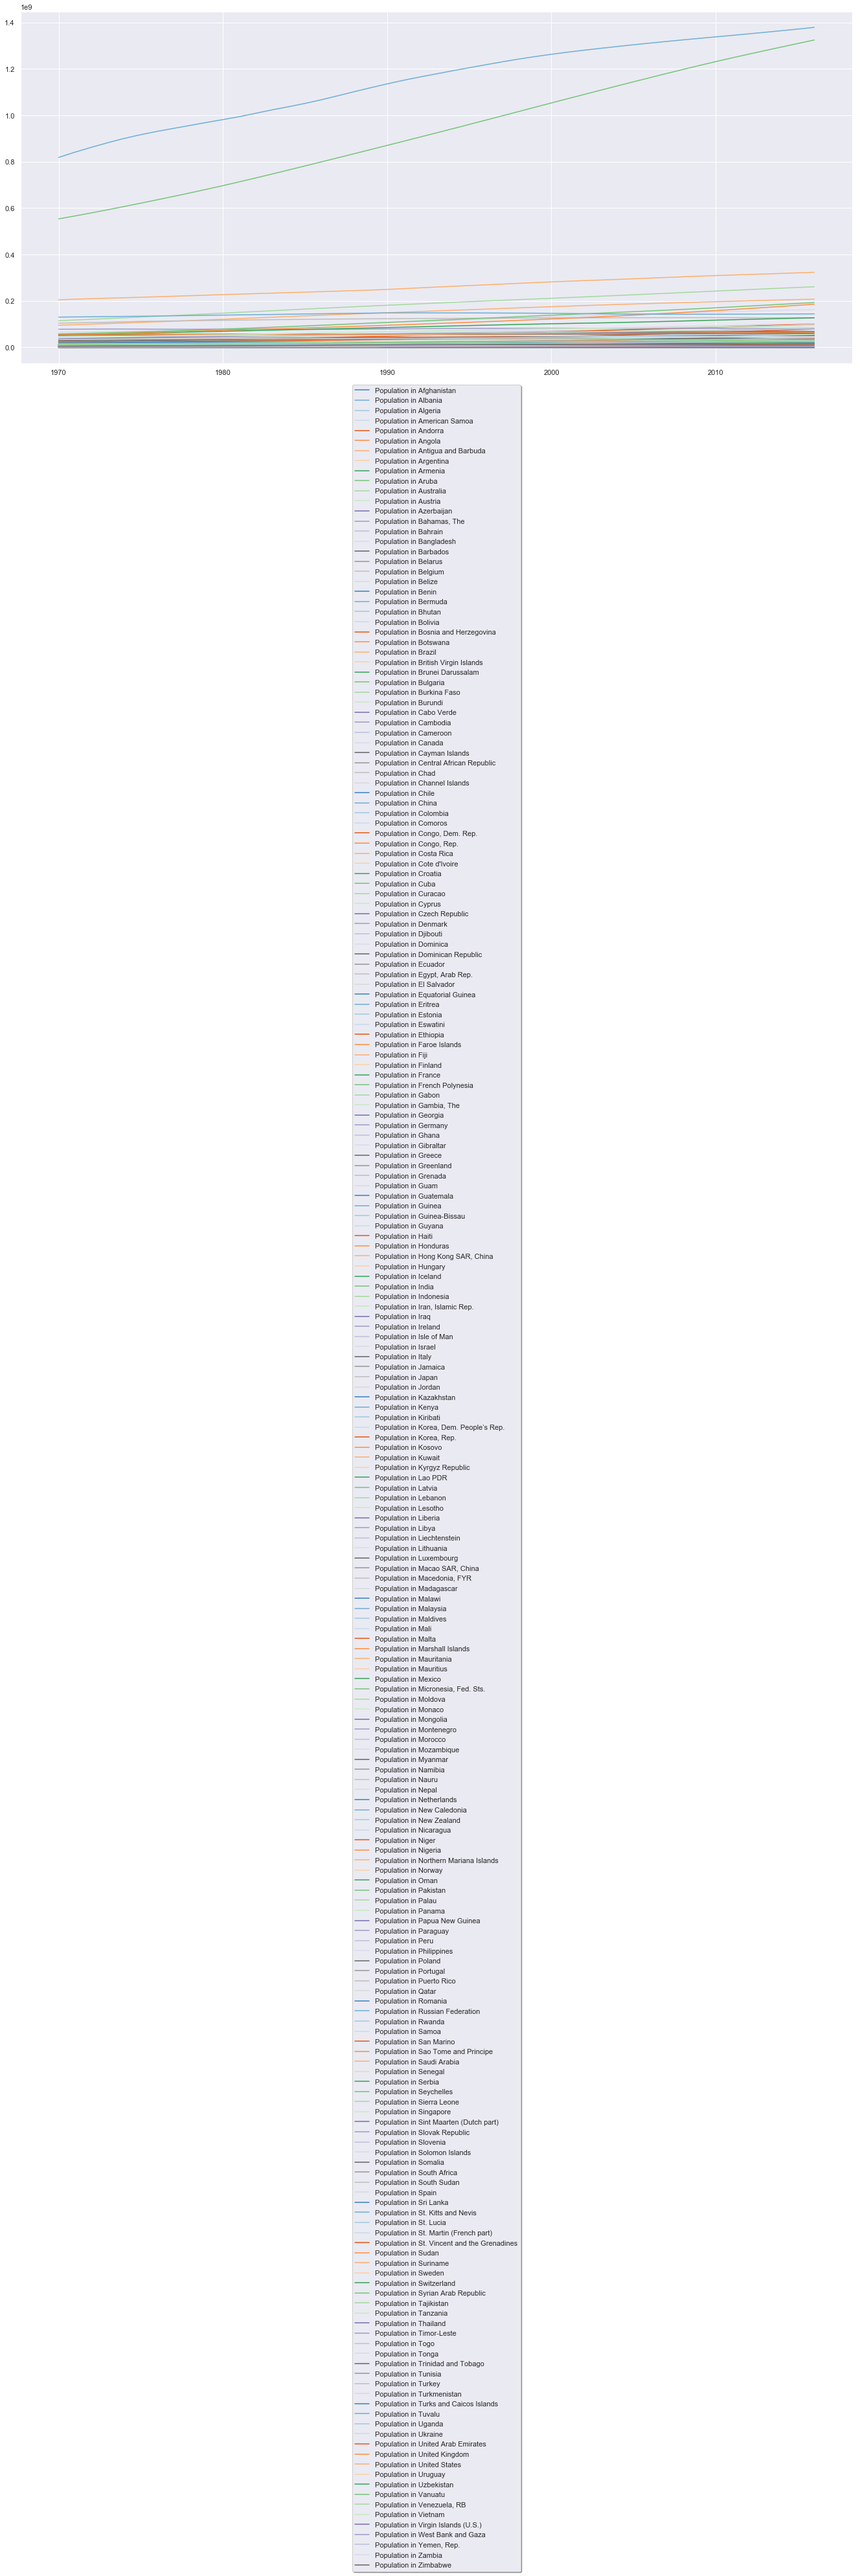

In [47]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20c.colors)
cfig, cax = plt.subplots(figsize=(23,10))

for country, group in pop_total_plot_df.groupby(['country']):
    cax.plot(group['year'], group['population'], label = 'Population in %s' % country)
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.05), fancybox = True, shadow = True)
plt.show()